In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [4]:
data = pd.read_csv('data/loci_gh2ax_pbp_.csv')
data.head()

Unnamed: 0                                              label  \
0           0  (10)doxo12h-h2ax-647-ku80-564-fak-488-dapi-09_...   
1           1  (10)doxo12h-h2ax-647-ku80-564-fak-488-dapi-09_...   
2           2  (10)doxo12h-h2ax-647-ku80-564-fak-488-dapi-09_...   
3           3  (10)doxo12h-h2ax-647-ku80-564-fak-488-dapi-09_...   
4           4  (10)doxo12h-h2ax-647-ku80-564-fak-488-dapi-09_...   

   gammah2ax_fak  gammah2ax_ku80  fak_ku80  gammah2ax_rawintden  \
0       0.271595        0.201563 -0.072350             75024496   
1       0.485933        0.140737  0.041748             97876678   
2       0.437619        0.171030 -0.093832             87893340   
3       0.466234        0.180523 -0.153511            108339035   
4       0.577794        0.303963  0.157191             94082731   

   fak_rawintden  ku80_rawintden  tto  gammah2ax_dapi  dapi_ku80  \
0      8038343.0        41342200  dox             NaN        NaN   
1      8391729.0        40538800  dox             NaN        NaN   
2      6401737.0        43842736  dox             NaN        NaN   
3      9204125.0        53976999  dox             NaN        NaN   
4      7032331.0        42190792  dox             NaN        NaN   

   dapi_rawintden  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [3]:
#grupos

dox_filt = (data['tto'] == 'dox')
dox_sc_filt = (data['tto'] == 'dox_sc')
dox_sifak_filt = (data['tto'] == 'dox_sifak')
dox_dmso_filt = (data['tto'] == 'dox_dmso')
dox_pf_filt = (data['tto'] == 'dox_pf')

corr_gh2ax_ku80_dox = data.loc[dox_filt,'gammah2ax_ku80']
corr_gh2ax_ku80_dox_sc = data.loc[dox_sc_filt,'gammah2ax_ku80']
corr_gh2ax_ku80_dox_sifak = data.loc[dox_sifak_filt,'gammah2ax_ku80']
corr_gh2ax_ku80_dox_dmso = data.loc[dox_dmso_filt,'gammah2ax_ku80']
corr_gh2ax_ku80_dox_pf = data.loc[dox_pf_filt,'gammah2ax_ku80']

corr_gh2ax_fak_dox = data.loc[dox_filt,'gammah2ax_fak']

corr_ku80_fak_dox = data.loc[dox_filt,'fak_ku80']
corr_ku80_fak_dox_dmso = data.loc[dox_dmso_filt,'fak_ku80']
corr_ku80_fak_dox_pf = data.loc[dox_pf_filt,'fak_ku80']


In [4]:
data2 = data.drop(data.index[data['tto'] == 'dox'])

In [5]:
dox_gh2axfak_gh2ax_ku80 = data.loc[dox_filt, ['gammah2ax_fak', 'gammah2ax_ku80', 'fak_ku80']]

In [6]:
dox_gh2axfak_gh2ax_ku80

gammah2ax_fak  gammah2ax_ku80  fak_ku80
0          0.271595        0.201563 -0.072350
1          0.485933        0.140737  0.041748
2          0.437619        0.171030 -0.093832
3          0.466234        0.180523 -0.153511
4          0.577794        0.303963  0.157191
...             ...             ...       ...
1079       0.666219        0.124067  0.060527
1080       0.486572       -0.000575 -0.189843
1081       0.226322       -0.016010 -0.442892
1082       0.518870       -0.030118 -0.144786
1083       0.381620       -0.050585 -0.354025

[1084 rows x 3 columns]

In [7]:
data2

Unnamed: 0                                              label  \
1084           0  dox-DMSO-h2ax-647-ku80-564-fak-488-dapi-01_Out...   
1085           1  dox-DMSO-h2ax-647-ku80-564-fak-488-dapi-01_Out...   
1086           2  dox-DMSO-h2ax-647-ku80-564-fak-488-dapi-01_Out...   
1087           3  dox-DMSO-h2ax-647-ku80-564-fak-488-dapi-01_Out...   
1088           4  dox-DMSO-h2ax-647-ku80-564-fak-488-dapi-01_Out...   
...          ...                                                ...   
4406        1106  (8)CT-siFAK-h2ax-647-ku80-564-dapi-10_Out_Chan...   
4407        1107  (8)CT-siFAK-h2ax-647-ku80-564-dapi-10_Out_Chan...   
4408        1108  (8)CT-siFAK-h2ax-647-ku80-564-dapi-10_Out_Chan...   
4409        1109  (8)CT-siFAK-h2ax-647-ku80-564-dapi-10_Out_Chan...   
4410        1110  (8)CT-siFAK-h2ax-647-ku80-564-dapi-10_Out_Chan...   

      gammah2ax_fak  gammah2ax_ku80  fak_ku80  gammah2ax_rawintden  \
1084       0.424552       -0.079363 -0.066344             23421708   
1085       0.484598       -0.047611 -0.117290             21067612   
1086       0.534891       -0.124672 -0.141909             12746722   
1087       0.559823       -0.071584  0.026652             57862630   
1088       0.465392       -0.120652 -0.196241             19647978   
...             ...             ...       ...                  ...   
4406            NaN       -0.033809       NaN              7362057   
4407            NaN        0.033619       NaN             12659893   
4408            NaN        0.046693       NaN              7208532   
4409            NaN       -0.023408       NaN              7894506   
4410            NaN       -0.034523       NaN              4922755   

      fak_rawintden  ku80_rawintden        tto  gammah2ax_dapi  dapi_ku80  \
1084     53413075.0        15695360   dox_dmso             NaN        NaN   
1085     42807460.0        16732766   dox_dmso             NaN        NaN   
1086     33271400.0        16077263   dox_dmso             NaN        NaN   
1087    128643005.0        18386019   dox_dmso             NaN        NaN   
1088     48882314.0        14061112   dox_dmso             NaN        NaN   
...             ...             ...        ...             ...        ...   
4406            NaN         5635631  dox_sifak        0.299268   0.007515   
4407            NaN         7154210  dox_sifak        0.274220   0.043311   
4408            NaN         5478740  dox_sifak        0.250180  -0.066005   
4409            NaN         5898569  dox_sifak       -0.114827  -0.085146   
4410            NaN         4343050  dox_sifak       -0.231961  -0.107380   

      dapi_rawintden  
1084             NaN  
1085             NaN  
1086             NaN  
1087             NaN  
1088             NaN  
...              ...  
4406     207509433.0  
4407     299191640.0  
4408     238429165.0  
4409     378646207.0  
4410     229642200.0  

[3327 rows x 12 columns]

In [8]:
print(corr_gh2ax_ku80_dox.mean())
print(corr_gh2ax_ku80_dox_sc.mean())
print(corr_gh2ax_ku80_dox_sifak.mean())
print(corr_gh2ax_ku80_dox_dmso.mean())
print(corr_gh2ax_ku80_dox_pf.mean())

0.08772704214575645
0.14312018996262457
0.10864861417191711
0.05237802459287529
0.019864844004846532


In [9]:
stat, p = ttest_ind(corr_gh2ax_ku80_dox_sc, corr_gh2ax_ku80_dox_sifak)
print('corr gammah2ax_ku80: t=%.3f, p=%.5f' % (stat, p))

corr gammah2ax_ku80: t=5.713, p=0.00000


In [10]:
stat, p = ttest_ind(corr_gh2ax_ku80_dox_dmso, corr_gh2ax_ku80_dox_pf)
print('corr gammah2ax_ku80: t=%.3f, p=%.5f' % (stat, p))

corr gammah2ax_ku80: t=3.971, p=0.00008


In [11]:
corr_gh2ax_ku80_dox_pf

1477   -0.154268
1478    0.279884
1479    0.391535
1480   -0.013636
1481   -0.037763
          ...   
2091   -0.021510
2092   -0.068130
2093    0.042482
2094    0.014034
2095   -0.030460
Name: gammah2ax_ku80, Length: 619, dtype: float64

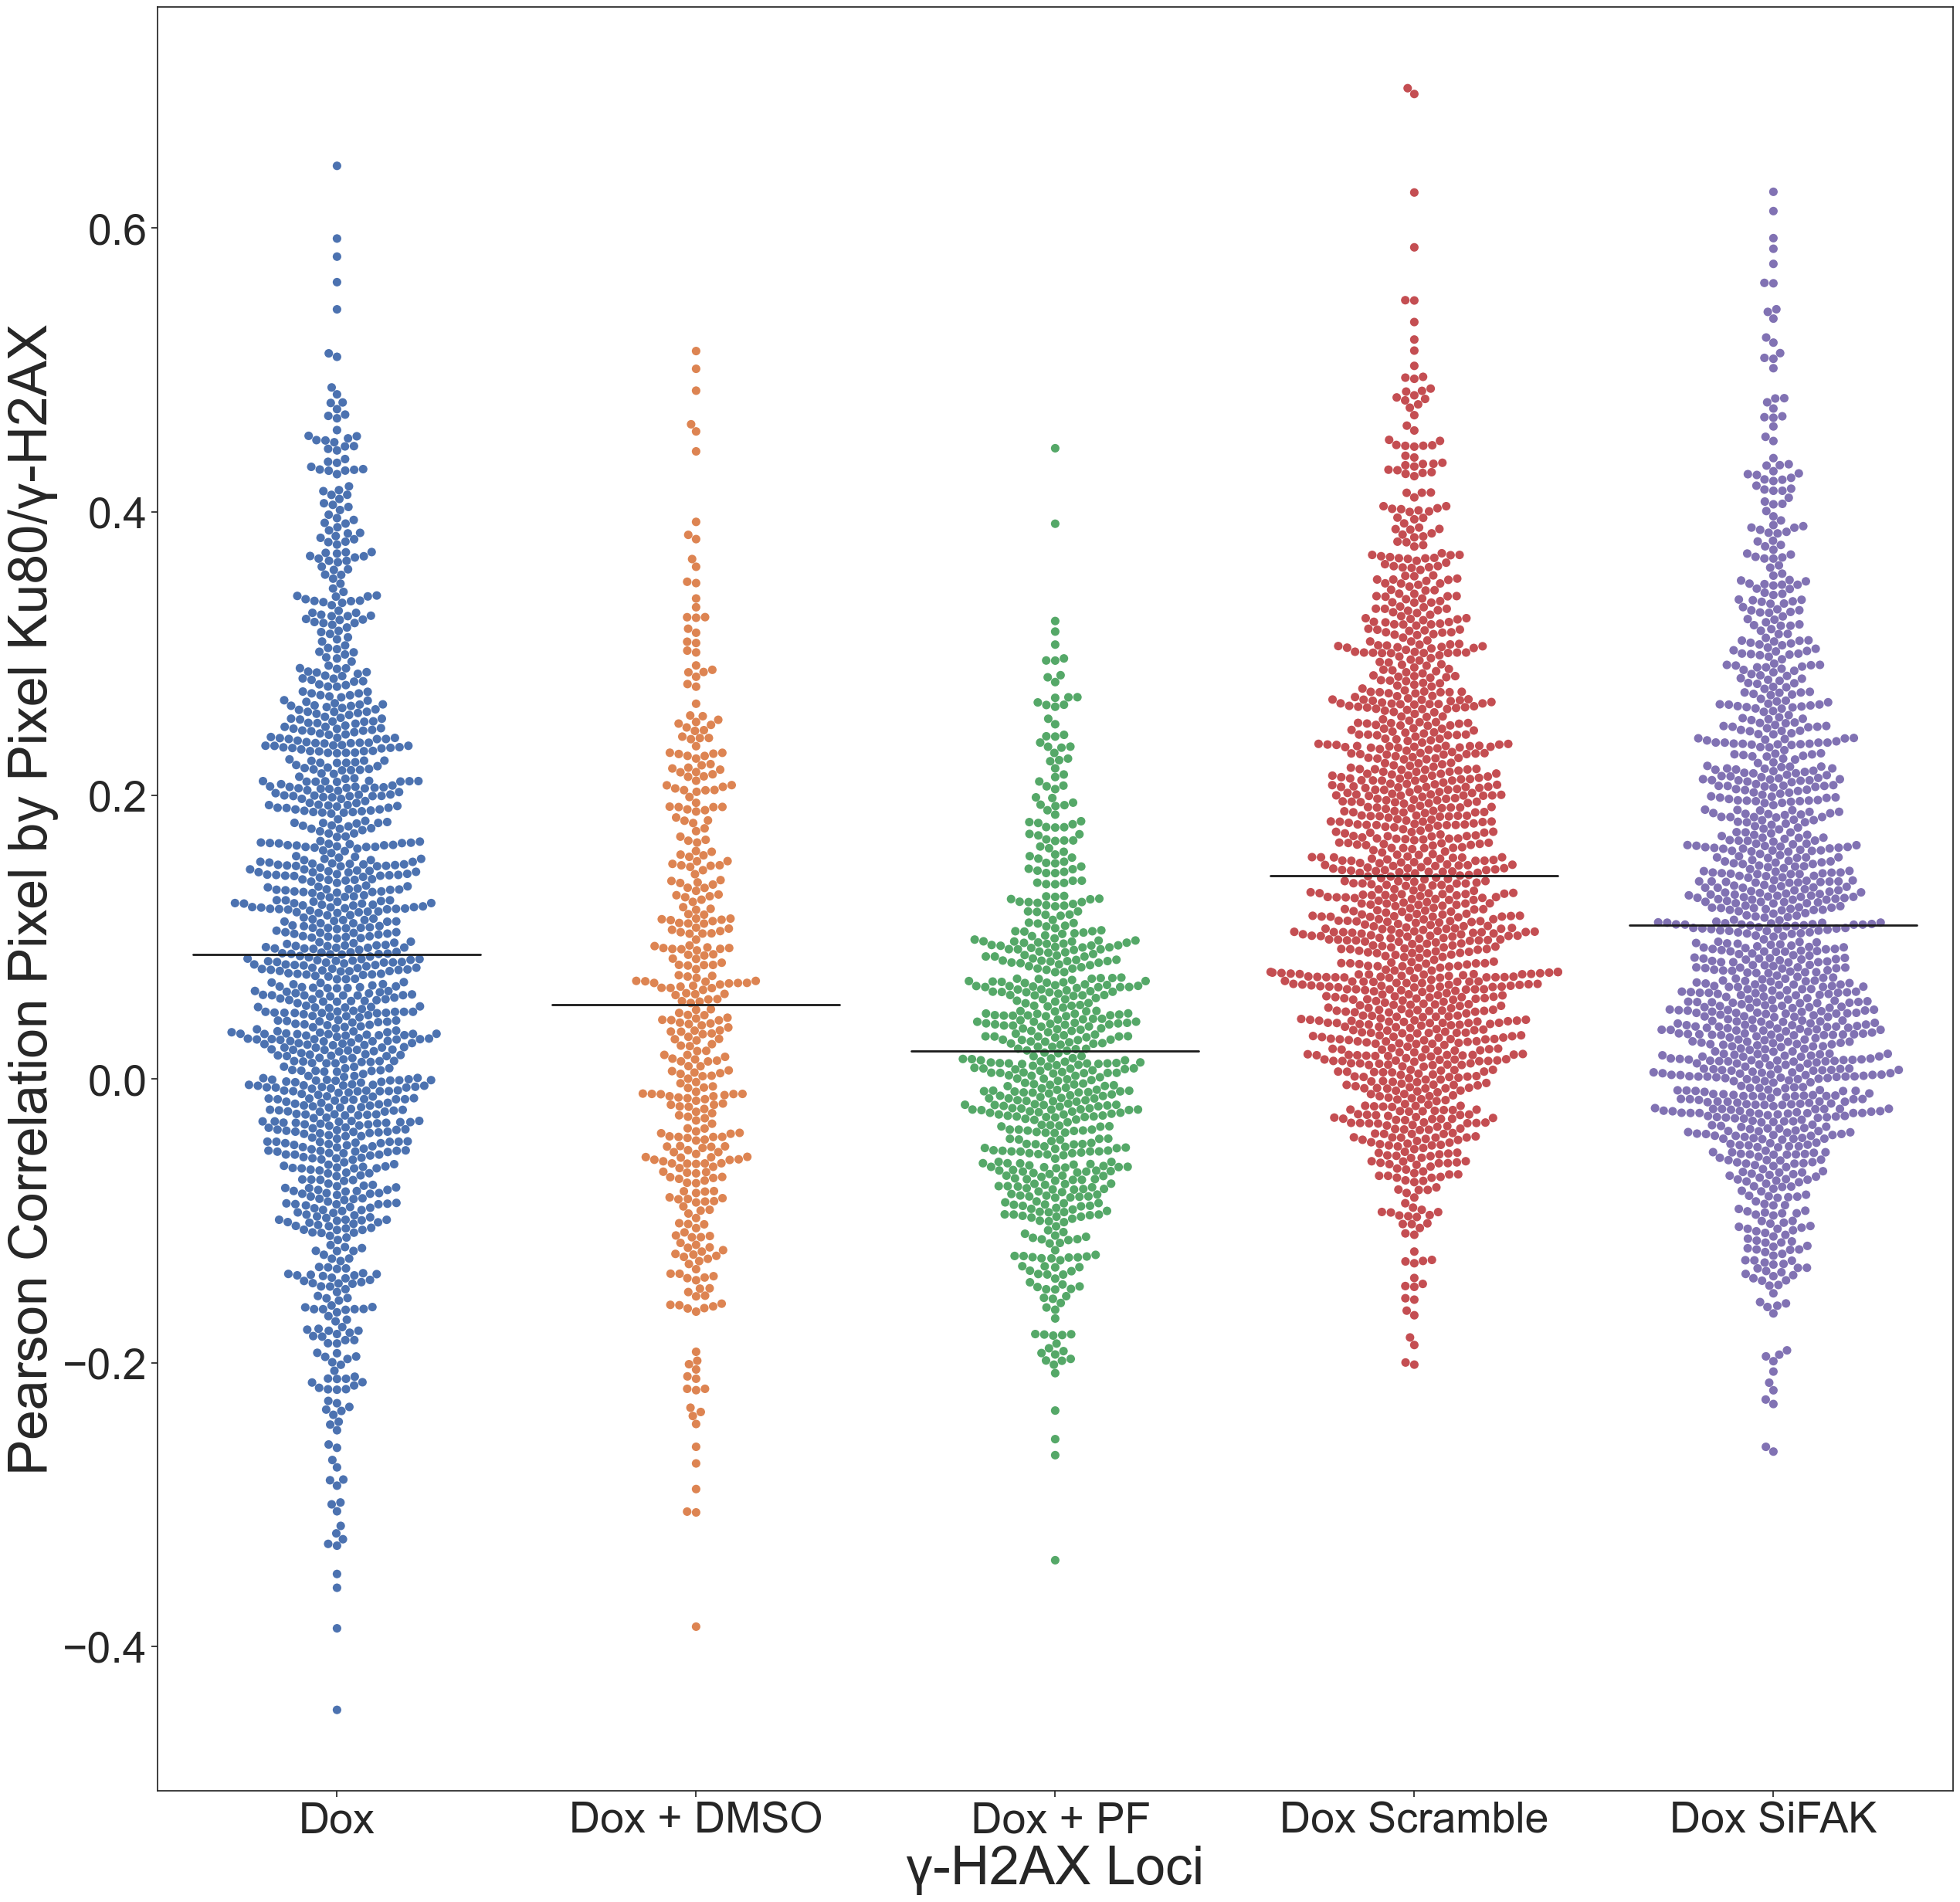

In [12]:
nome_figura = 'swarmplot_pc_gh2ax-ku80'

label_eixo_y = 'Pearson Correlation Pixel by Pixel Ku80/γ-H2AX'
label_eixo_x = 'γ-H2AX Loci'
tamanho_label = 50

# sns.set_context("paper")

sns.set(rc={"figure.figsize":(30, 30)}) # width=20, height=20
sns.despine()
sns.set_style("ticks")

ax = sns.swarmplot(x="tto", y="gammah2ax_ku80", data=data, size=8)

# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="tto",
            y="gammah2ax_ku80",
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

plt.xticks([0,1,2,3,4],['Dox','Dox + DMSO',' Dox + PF','Dox Scramble','Dox SiFAK'], size=40)
plt.yticks(size=40)
# sns.set(font_scale = 8)
# aqui você controla a escala da fonte

plt.savefig(nome_figura + ".pdf") #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg")

plt.show()

t=3.971, p=0.00008
****
t=5.713, p=0.00000
****


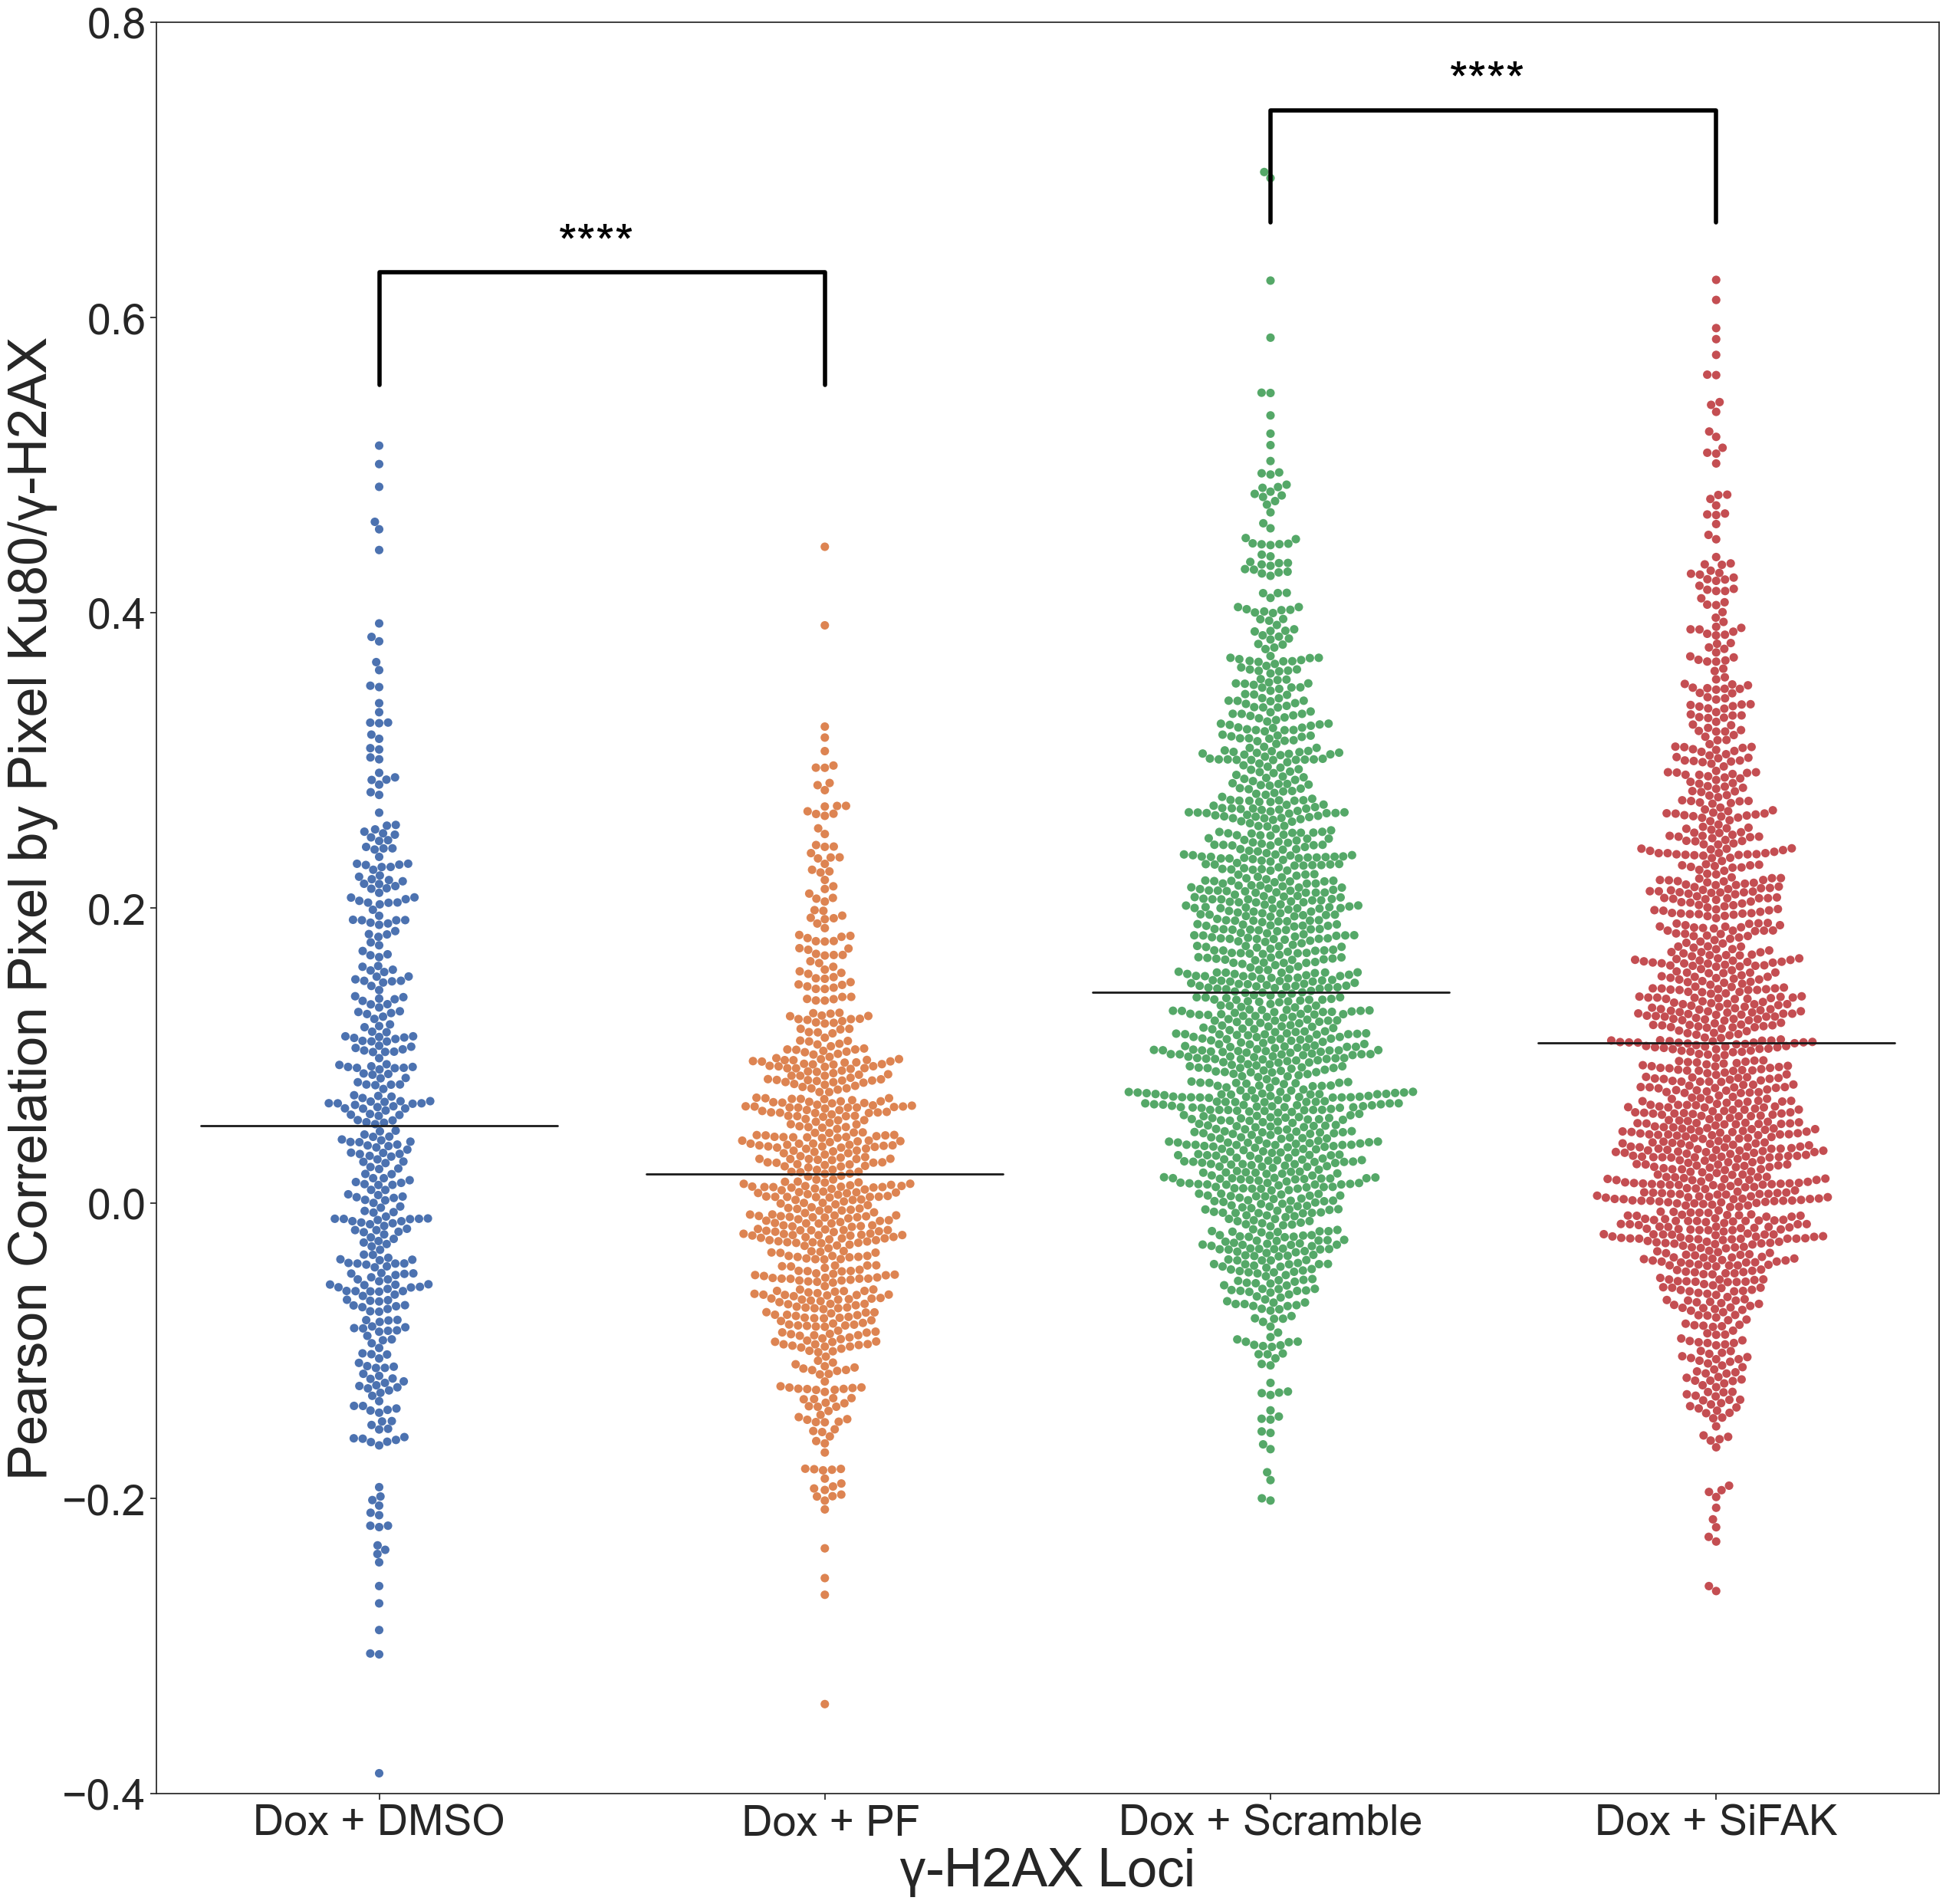

In [13]:
nome_figura = 'swarmplot_pc_gh2ax-ku80_semdox1'

label_eixo_y = 'Pearson Correlation Pixel by Pixel Ku80/γ-H2AX'
label_eixo_x = 'γ-H2AX Loci'
tamanho_label = 50

#ttest groups
grupo1 = corr_gh2ax_ku80_dox_dmso
grupo2 = corr_gh2ax_ku80_dox_pf
grupo3 = corr_gh2ax_ku80_dox_sc
grupo4 = corr_gh2ax_ku80_dox_sifak

# sns.set_context("paper")
sns.despine()
sns.set_style("ticks")

def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,hight):
    x = (X[0]+X[1])/2
    y = 1.1* max(Y[0], Y[1])+hight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.1 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.2*max(Y)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

x = [0,1,2,3]

ax = sns.swarmplot(x="tto", y="gammah2ax_ku80", data=data2, size=8)
sns.set(rc={"figure.figsize":(30, 30)}) # width=20, height=20

# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="tto",
            y="gammah2ax_ku80",
            data=data2,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

plt.xticks([0,1,2,3,],['Dox + DMSO',' Dox + PF','Dox + Scramble','Dox + SiFAK'], size=40)
plt.yticks(size=40)
# aqui você controla a escala da fonte

# chamando def para os traços
traco(ttesting(grupo1,grupo2),x[0:2],[0.5,0.5],-0.01)
traco(ttesting(grupo3,grupo4),x[2:4],[0.5,0.5],0.1)

plt.ylim(-0.4, 0.8)
# sns.set(font_scale = 4)
plt.savefig(nome_figura + ".pdf") #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg")

plt.show()

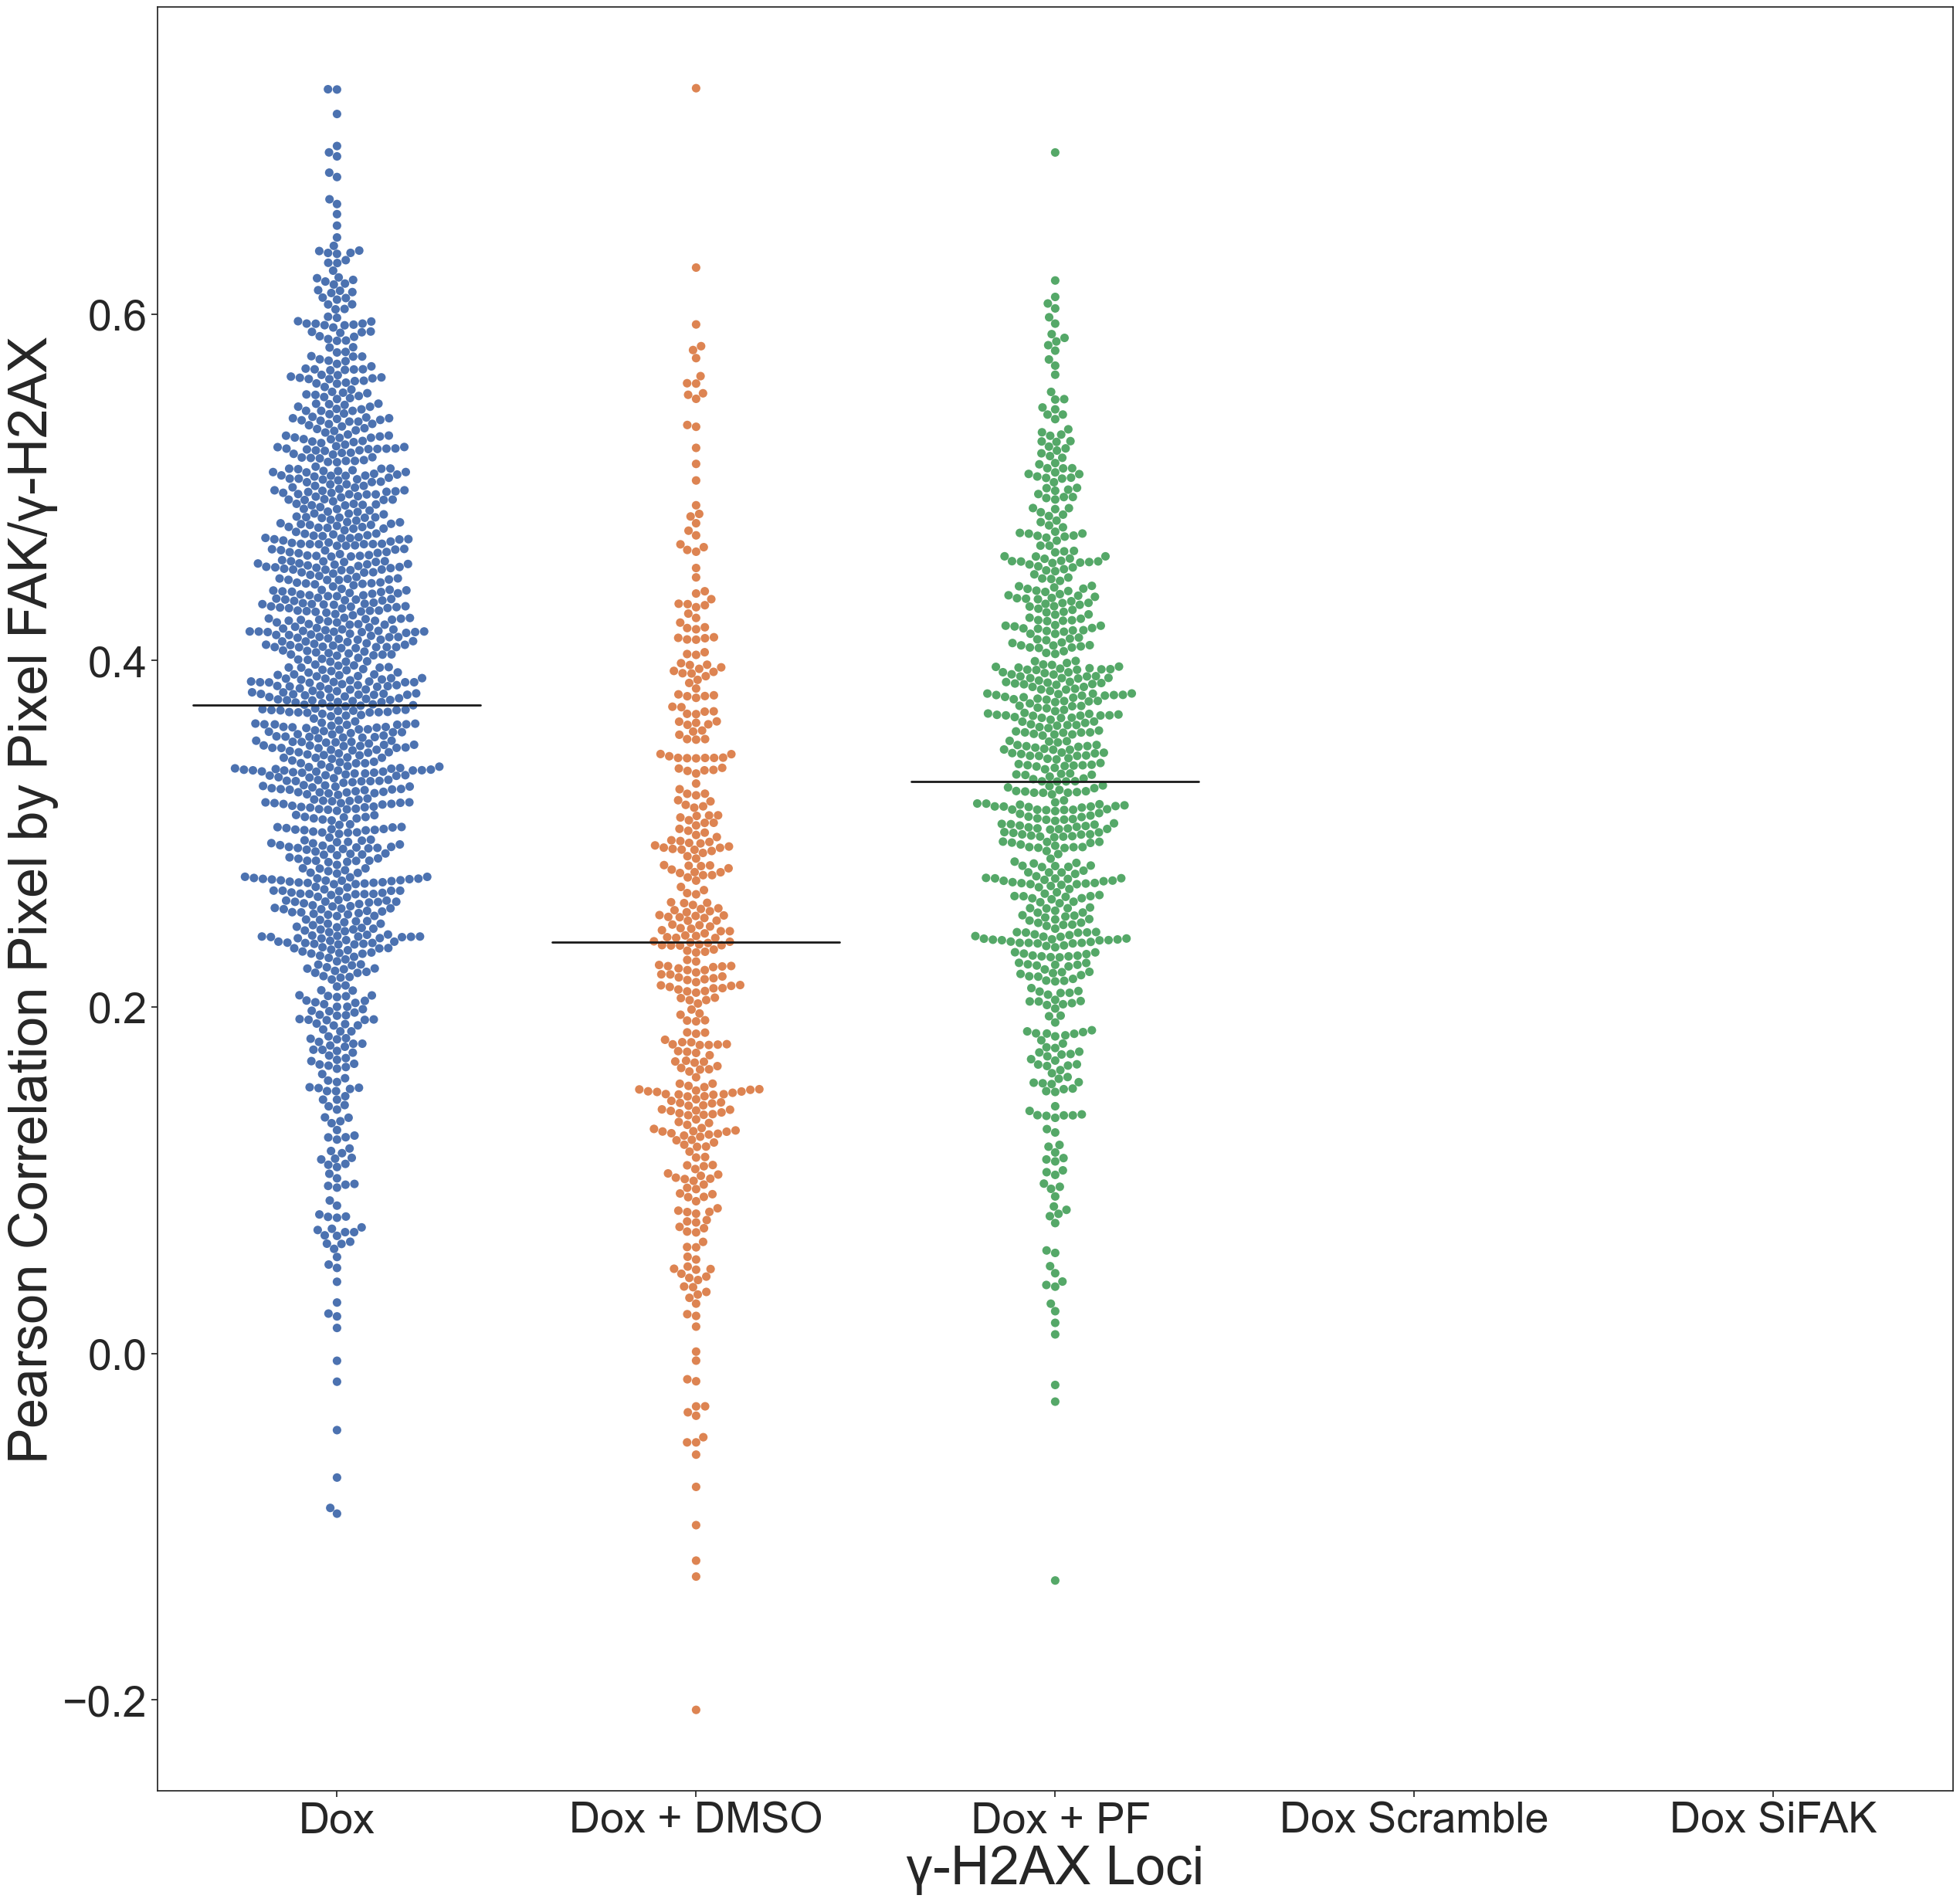

In [14]:
nome_figura = 'swarmplot_pc_gh2ax-fak'

label_eixo_y = 'Pearson Correlation Pixel by Pixel FAK/γ-H2AX'
label_eixo_x = 'γ-H2AX Loci'
tamanho_label = 50

# sns.set_context("paper")
sns.despine()
sns.set_style("ticks")


ax = sns.swarmplot(x="tto", y="gammah2ax_fak", data=data, size=8)
sns.set(rc={"figure.figsize":(30, 20)}) # width=20, height=20

# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="tto",
            y="gammah2ax_fak",
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

plt.xticks([0,1,2,3,4],['Dox','Dox + DMSO',' Dox + PF','Dox Scramble','Dox SiFAK'], size=40)
plt.yticks(size=40)
# aqui você controla a escala da fonte

# sns.set(font_scale = 4)
plt.savefig(nome_figura + ".pdf") #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg")

plt.show()

In [15]:
sns.set(font_scale = 4)

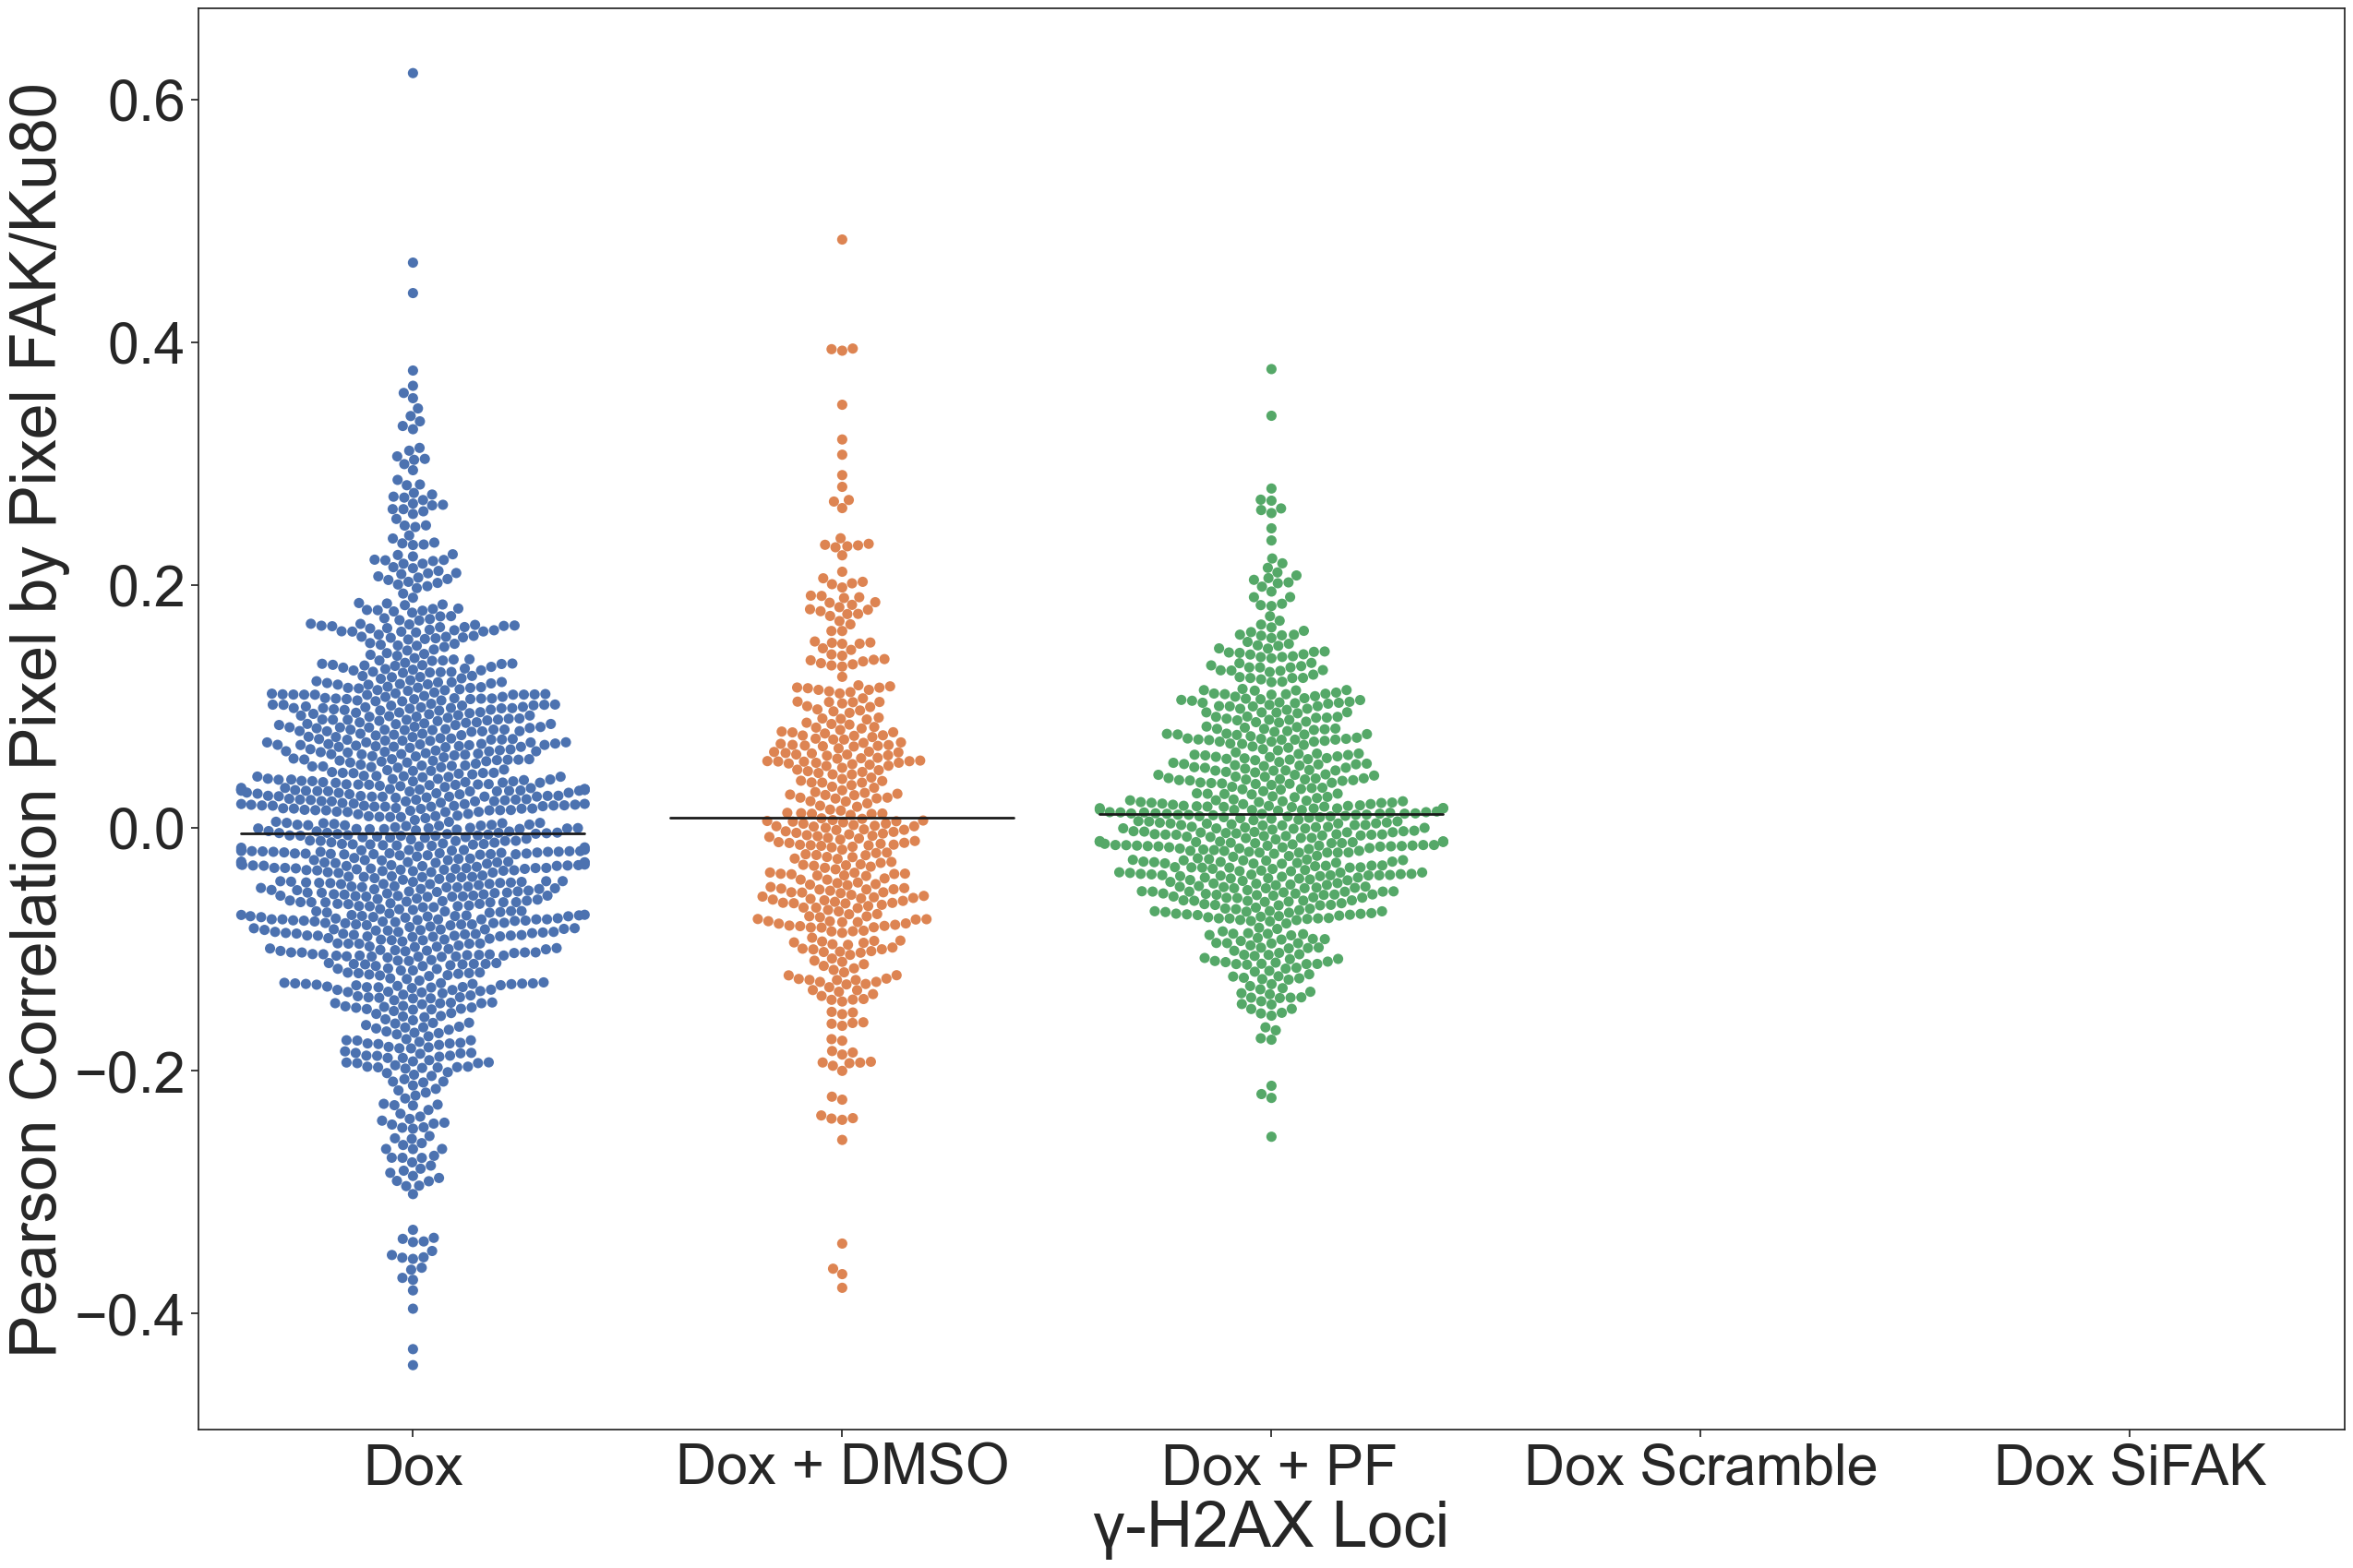

In [16]:
nome_figura = 'swarmplot_pc_ku80-fak'

label_eixo_y = 'Pearson Correlation Pixel by Pixel FAK/Ku80'
label_eixo_x = 'γ-H2AX Loci'
tamanho_label = 50

# sns.set_context("paper")
sns.despine()
sns.set_style("ticks")


ax = sns.swarmplot(x="tto", y="fak_ku80", data=data, size=8)
sns.set(rc={"figure.figsize":(30, 30)}) # width=20, height=20

# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="tto",
            y="fak_ku80",
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

plt.xticks([0,1,2,3,4],['Dox','Dox + DMSO',' Dox + PF','Dox Scramble','Dox SiFAK'])
# aqui você controla a escala da fonte

sns.set(font_scale = 4)
plt.savefig(nome_figura + ".pdf") #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg")

plt.show()

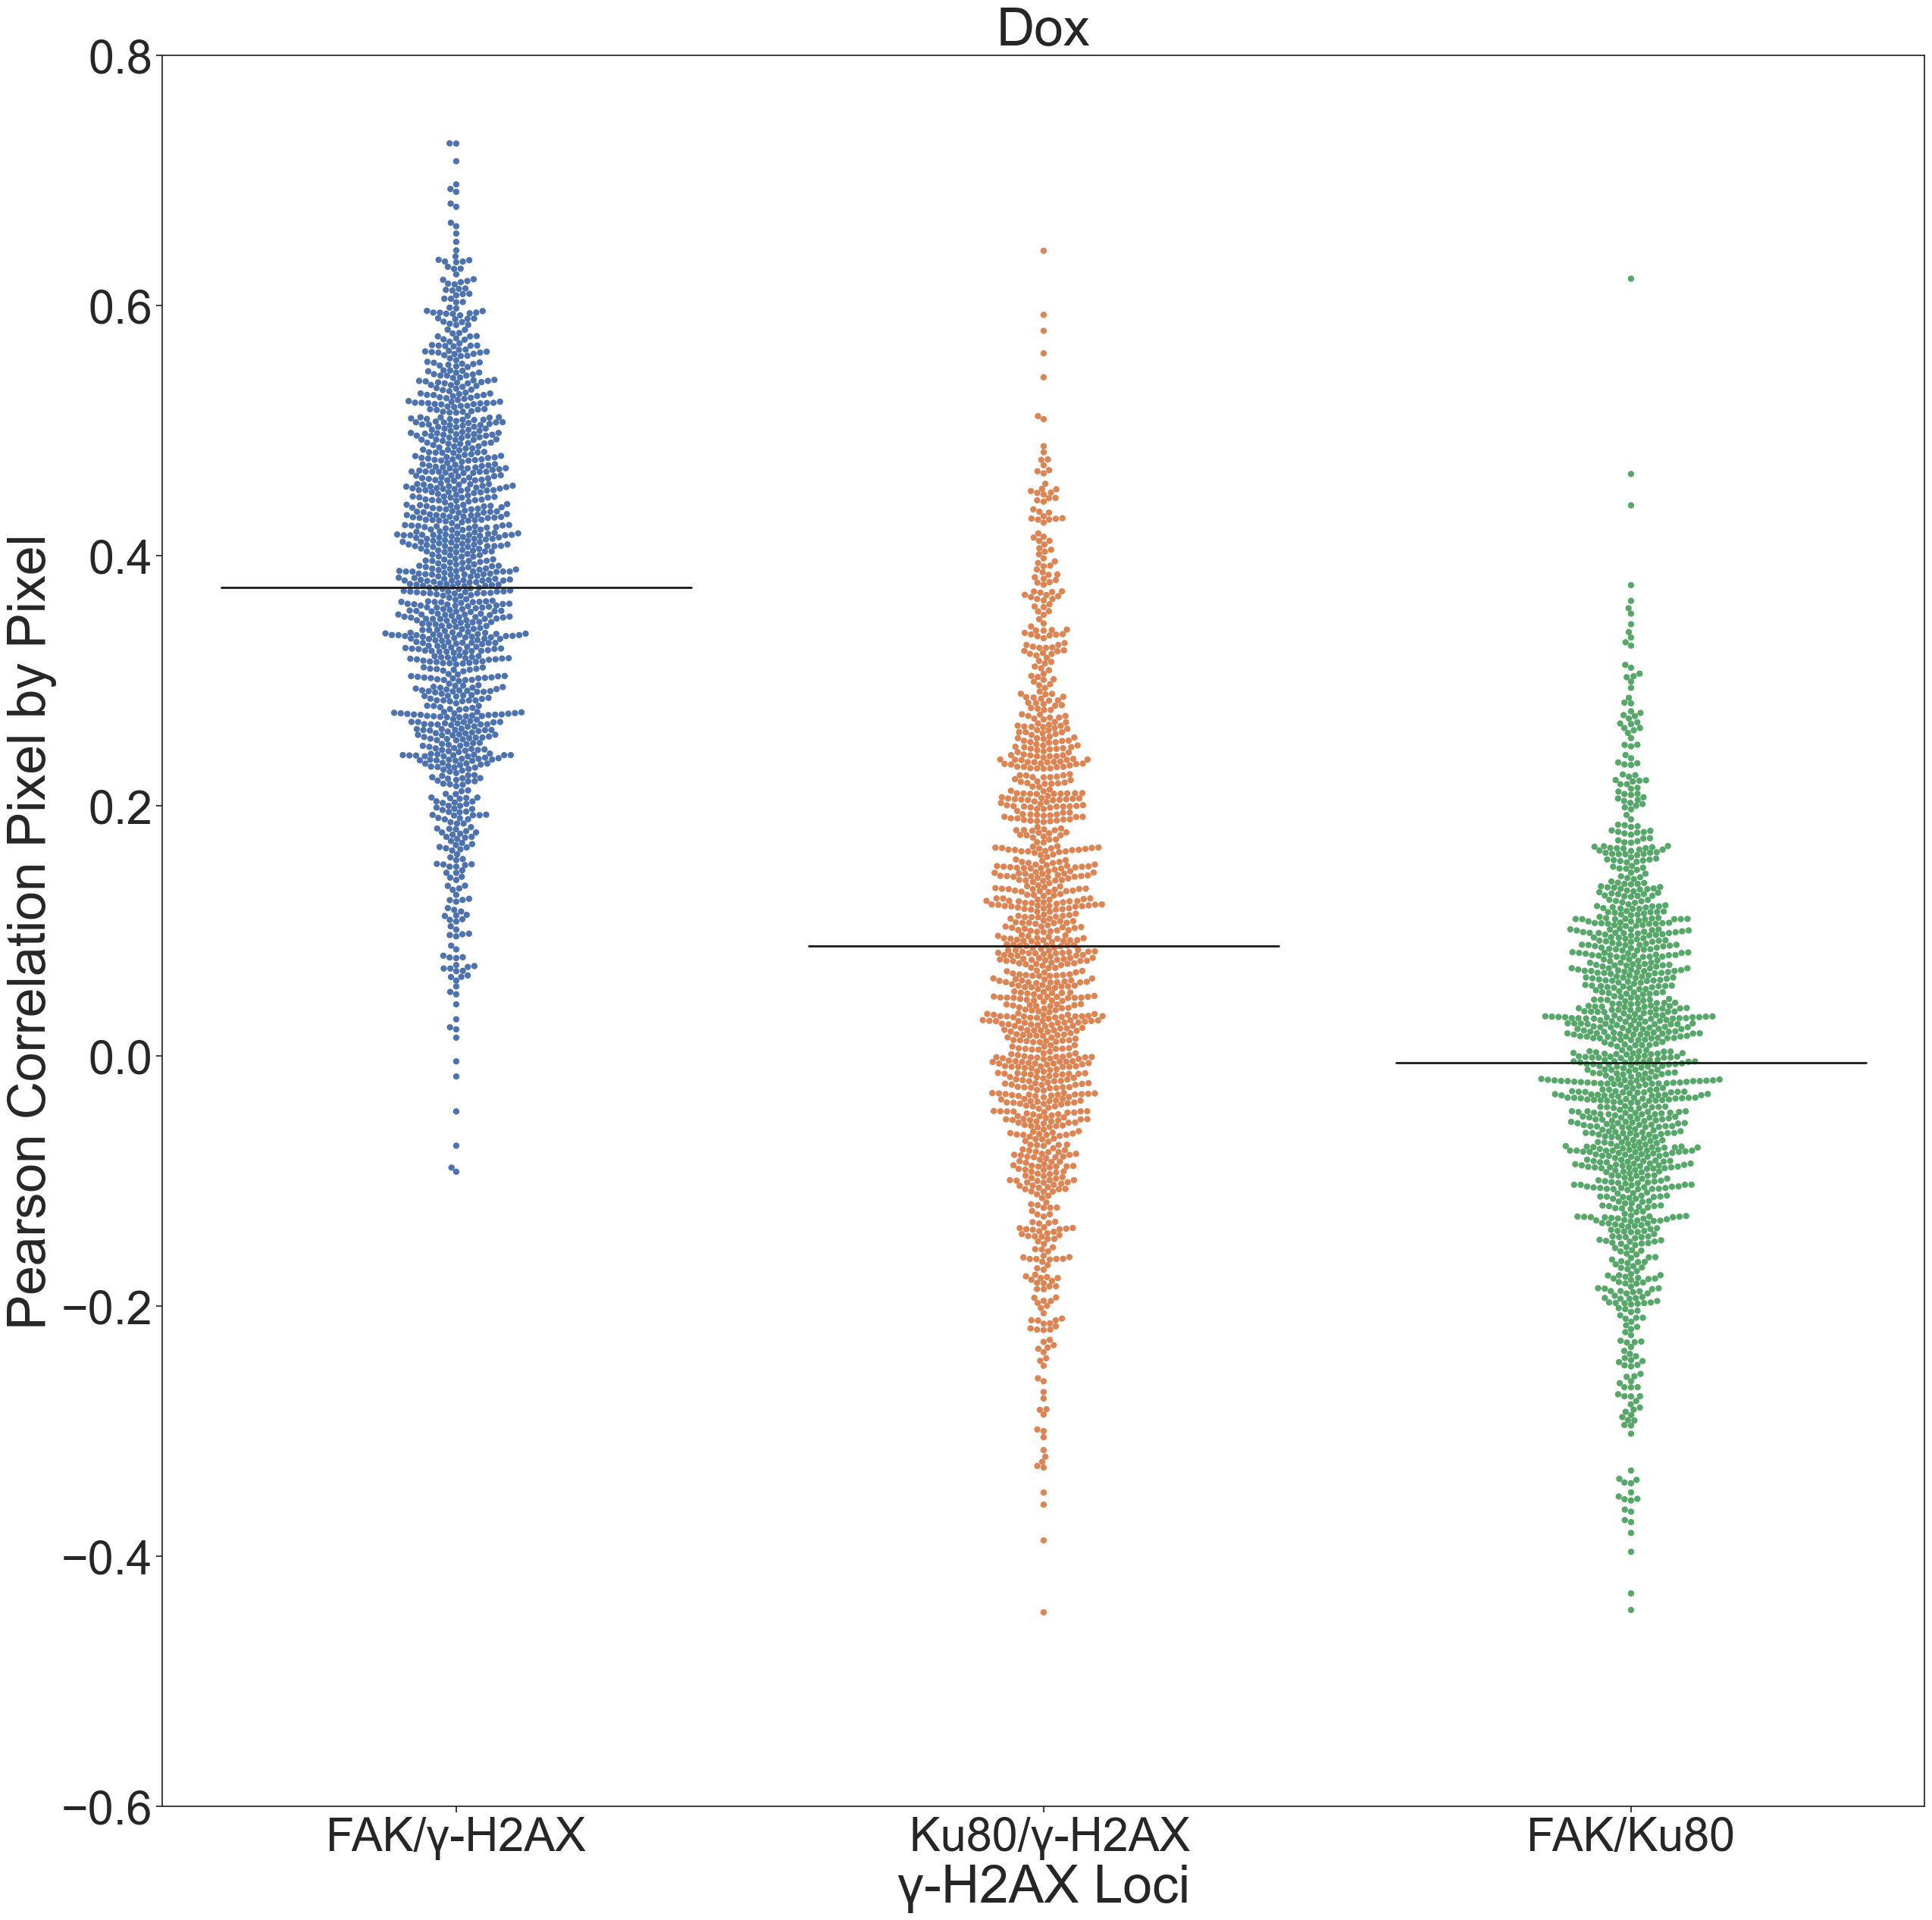

In [17]:
nome_figura = 'swarmplot_pc_dox'

label_eixo_y = 'Pearson Correlation Pixel by Pixel'
label_eixo_x = 'γ-H2AX Loci'
title = 'Dox'
tamanho_label = 50
other_label = 40
#ttest groups

grupo1 = corr_gh2ax_ku80_dox
grupo2 = corr_gh2ax_fak_dox
grupo3 = corr_ku80_fak_dox
# grupo4 = corr_gh2ax_ku80_dox_sifak

# sns.set_context("paper")
sns.despine()
sns.set_style("ticks")

def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,hight):
    x = (X[0]+X[1])/2
    y = 1.1* max(Y[0], Y[1])+hight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.1 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.2*max(Y)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

x = [0,1]

ax = sns.swarmplot(data=dox_gh2axfak_gh2ax_ku80, size=6)
sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20

# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=dox_gh2axfak_gh2ax_ku80,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

plt.xticks([0,1,2],['FAK/γ-H2AX',' Ku80/γ-H2AX', 'FAK/Ku80'])
# aqui você controla a escala da fonte
ax.axes.set_title(title, fontsize=50)
# chamando def para os traços
# traco(ttesting(grupo1,grupo2),x[0:2],[0.5,0.5],-0.01)
# traco(ttesting(grupo3,grupo4),x[2:4],[0.5,0.5],0.1)
plt.ylim(-0.6, 0.8)
sns.set(font_scale = 3)
plt.savefig(nome_figura + ".pdf") #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg")
plt.show()

In [18]:
#grupos

dox_filt = (data['tto'] == 'dox')
dox_sc_filt = (data['tto'] == 'dox_sc')
dox_sifak_filt = (data['tto'] == 'dox_sifak')
dox_dmso_filt = (data['tto'] == 'dox_dmso')
dox_pf_filt = (data['tto'] == 'dox_pf')

corr_gh2ax_ku80_dox = data.loc[dox_filt,'gammah2ax_ku80']
corr_gh2ax_ku80_dox_sc = data.loc[dox_sc_filt,'gammah2ax_ku80']
corr_gh2ax_ku80_dox_sifak = data.loc[dox_sifak_filt,'gammah2ax_ku80']
corr_gh2ax_ku80_dox_dmso = data.loc[dox_dmso_filt,'gammah2ax_ku80']
corr_gh2ax_ku80_dox_pf = data.loc[dox_pf_filt,'gammah2ax_ku80']

corr_gh2ax_fak_dox = data.loc[dox_filt,'gammah2ax_fak']

corr_ku80_fak_dox = data.loc[dox_filt,'fak_ku80']
corr_ku80_fak_dox_dmso = data.loc[dox_dmso_filt,'fak_ku80']
corr_ku80_fak_dox_pf = data.loc[dox_pf_filt,'fak_ku80']

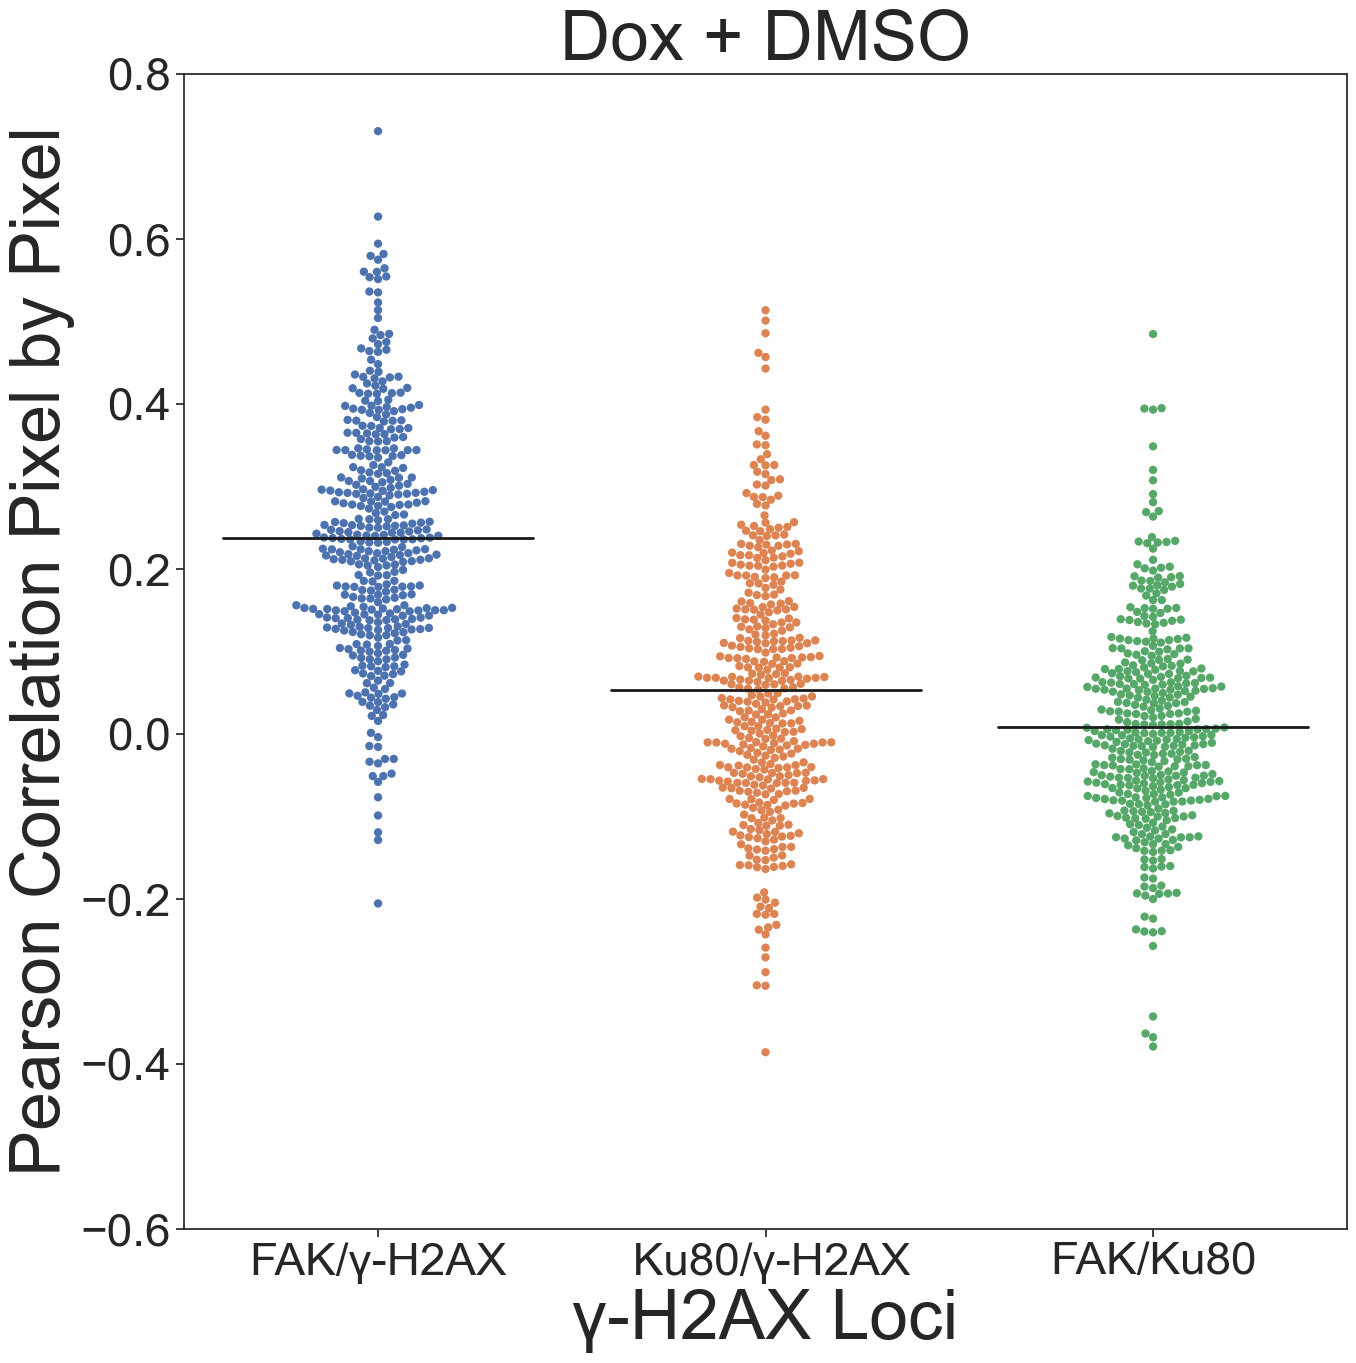

In [19]:
dox_dmso_data = data.loc[dox_dmso_filt, ['gammah2ax_fak', 'gammah2ax_ku80', 'fak_ku80']]
dataimage = dox_dmso_data

#----------------------------------

nome_figura = 'swarmplot_pc_dox_dmso'
title = 'Dox + DMSO'
label_eixo_y = 'Pearson Correlation Pixel by Pixel'
label_eixo_x = 'γ-H2AX Loci'
tamanho_label = 50
other_label = 40
#ttest groups

grupo1 = corr_gh2ax_ku80_dox
grupo2 = corr_gh2ax_fak_dox
grupo3 = corr_ku80_fak_dox
# grupo4 = corr_gh2ax_ku80_dox_sifak

# sns.set_context("paper")
sns.despine()
sns.set_style("ticks")

def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,hight):
    x = (X[0]+X[1])/2
    y = 1.1* max(Y[0], Y[1])+hight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.1 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.2*max(Y)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

x = [0,1]

ax = sns.swarmplot(data=dataimage, size=6)
sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20

# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=dataimage,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

plt.xticks([0,1,2],['FAK/γ-H2AX',' Ku80/γ-H2AX', 'FAK/Ku80'])
# aqui você controla a escala da fonte

# chamando def para os traços
# traco(ttesting(grupo1,grupo2),x[0:2],[0.5,0.5],-0.01)
# traco(ttesting(grupo3,grupo4),x[2:4],[0.5,0.5],0.1)
ax.axes.set_title(title, fontsize=50)
plt.ylim(-0.6, 0.8)
sns.set(font_scale = 3)
plt.savefig(nome_figura + ".pdf") #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg")

plt.show()

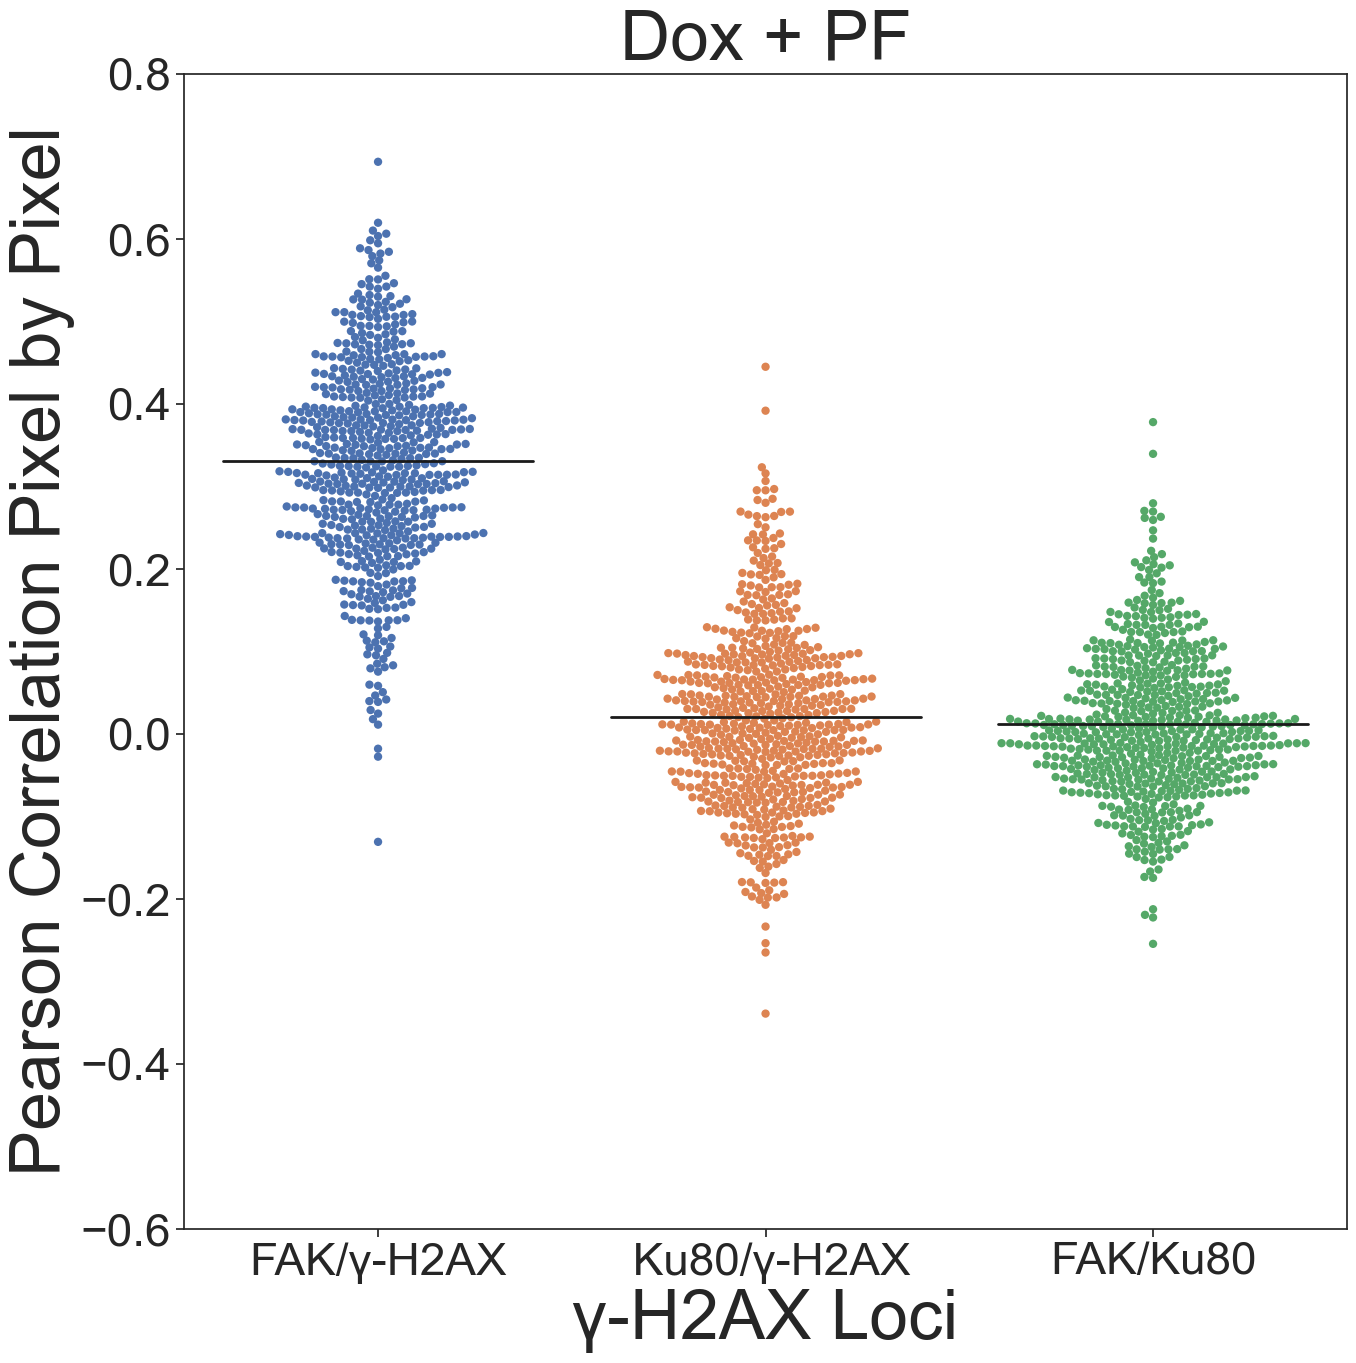

In [20]:
dox_pf_data = data.loc[dox_pf_filt, ['gammah2ax_fak', 'gammah2ax_ku80', 'fak_ku80']]
dataimage = dox_pf_data

#----------------------------------

nome_figura = 'swarmplot_pc_dox_pf'
title = 'Dox + PF'
label_eixo_y = 'Pearson Correlation Pixel by Pixel'
label_eixo_x = 'γ-H2AX Loci'
tamanho_label = 50
other_label = 40
#ttest groups

grupo1 = corr_gh2ax_ku80_dox
grupo2 = corr_gh2ax_fak_dox
grupo3 = corr_ku80_fak_dox
# grupo4 = corr_gh2ax_ku80_dox_sifak

# sns.set_context("paper")
sns.despine()
sns.set_style("ticks")

def ttesting(a,b):
    stat, p = ttest_ind(a, b)
    print('t=%.3f, p=%.5f' % (stat, p))

    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.0001:
            return "****"
        elif pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return "NS"

    pValue = convert_pvalue_to_asterisks(p)
    print(convert_pvalue_to_asterisks(p))
    return pValue 

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y,hight):
    x = (X[0]+X[1])/2
    y = 1.1* max(Y[0], Y[1])+hight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.1 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.2*max(Y)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

x = [0,1]

ax = sns.swarmplot(data=dataimage, size=6)
sns.set(rc={"figure.figsize":(15, 15)}) # width=20, height=20

# plot the mean line (na verdade plota um boxplot mas apaga tudo menos a linha da média)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=dataimage,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

plt.ylabel(label_eixo_y, fontsize = tamanho_label)
plt.xlabel(label_eixo_x, fontsize = tamanho_label)

plt.xticks([0,1,2],['FAK/γ-H2AX',' Ku80/γ-H2AX', 'FAK/Ku80'])
# aqui você controla a escala da fonte

# chamando def para os traços
# traco(ttesting(grupo1,grupo2),x[0:2],[0.5,0.5],-0.01)
# traco(ttesting(grupo3,grupo4),x[2:4],[0.5,0.5],0.1)
ax.axes.set_title(title, fontsize=50)
plt.ylim(-0.6, 0.8)
sns.set(font_scale = 3)
plt.savefig(nome_figura + ".pdf") #salvar em .pdf pra sempre ter uma resolução infinita
plt.savefig(nome_figura + ".jpeg")

plt.show()